<h1>Example of how to sample from a pdf</h1>
<p>comments welcome</p>

In [1]:
import numpy  as np 
# use lognorm as analytical function here, this would be the PDF of a galaxy.
from scipy.stats import lognorm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#let's create a 'pdf' which we will sample from
bins = np.linspace(0.0, 2.0, 81) # 80 bins between 0-2.0
bins_c = (bins[:-1] + bins[1:]) / 2.0 #center of the bins

s = 0.653682269606
log_s = lognorm.pdf(bins_c, s)    

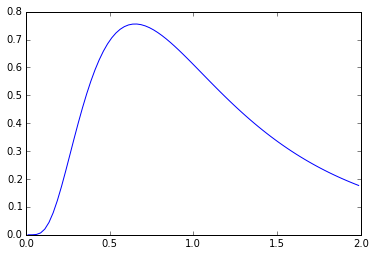

In [3]:
#quick plot to see how we are doing
# here bin_c are the center of your bins and log_s is a pfd (here not yet noramlized)
plt.plot(bins_c, log_s)

In [4]:
# now let's sample from this pdf N times just once
N = 1
a = np.random.choice(bins_c, size=N, replace=True, p=log_s/log_s.sum()) 
print a

[ 1.0125]


/Users/hoyleb/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


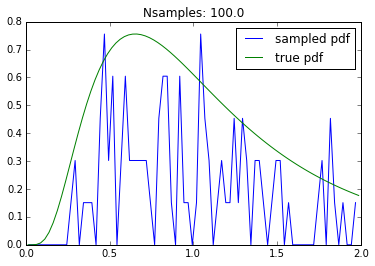

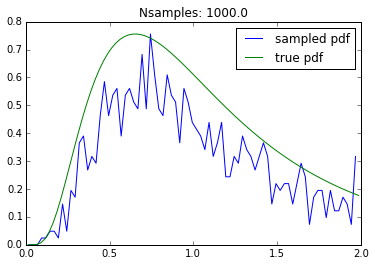

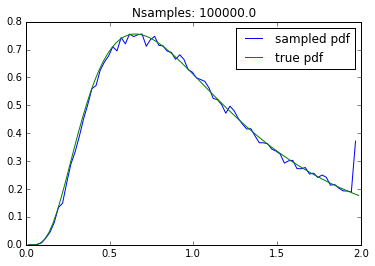

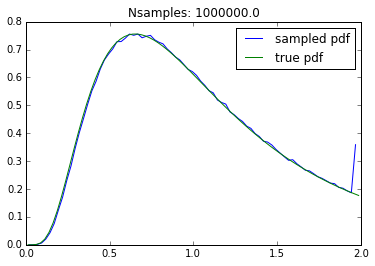

In [5]:
#now let's sample a heap of times, and see if we accuractly recreate the pdf

for N in [1e2, 1e3, 1e5, 1e6]:
    a = np.random.choice(bins_c, size=N, replace=True, p=log_s/log_s.sum()) 

    #need to turn this into a histogram
    h = np.histogram(a, bins = bins_c)[0]
    h = h*1.0 / np.amax(h) * np.max(log_s)
    f = plt.figure()
    plt.plot(bins_c[1: ] - bins_c[1]/2.0, h, label='sampled pdf')
    plt.plot(bins_c, log_s, label='true pdf')
    plt.title('Nsamples: ' + str(N))
    plt.legend(loc=1)